In [1]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [17]:
def sketch(photo):
    img_gray = cv2.cvtColor(photo, cv2.COLOR_BGR2RGBA)
    img_invert = cv2.bitwise_not(img_gray)
    img_smoothing = cv2.GaussianBlur(img_invert, (21, 21), sigmaX=0, sigmaY=0)
    
    def dodgeV2(image, mask):
        return cv2.divide(image, 255 - mask, scale=256)
    dodged_img = dodgeV2(img_gray, img_smoothing)
    
    def burnV2(image, mask):
        return 255 - cv2.divide(255-image, 255-mask, scale=256)
    output_image = burnV2(dodged_img, img_smoothing)
    
    plt.imshow(output_image)
    cv2.imwrite('sample 2.png', output_image)
    plt.show()

In [18]:
pic = cv2.imread('sample.jpg', 1)

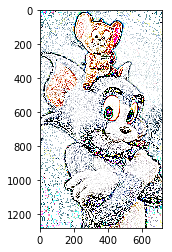

In [19]:
sketch(pic)